[I 2023-01-25 00:50:10,501] A new study created in memory with name: no-name-b5a92760-a64d-4286-8539-8412a7657b71


FrozenTrial(number=52, values=[0.8913419913419913], datetime_start=datetime.datetime(2023, 1, 20, 11, 27, 41, 71766), datetime_complete=datetime.datetime(2023, 1, 20, 13, 58, 8, 719171), params={'AdamW_foreach': 'True', 'BN_option': 'none', 'learning_rate': 0.00014481691819678513, 'weight_decay': 3.7957182272106284e-07}, distributions={'AdamW_foreach': CategoricalDistribution(choices=('True', 'False')), 'BN_option': CategoricalDistribution(choices=('none', 'inst')), 'learning_rate': LogUniformDistribution(high=10000.0, low=1e-05), 'weight_decay': LogUniformDistribution(high=1.0, low=1e-11)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=53, state=TrialState.COMPLETE, value=None)
0.8913419913419913
60 0 17 0


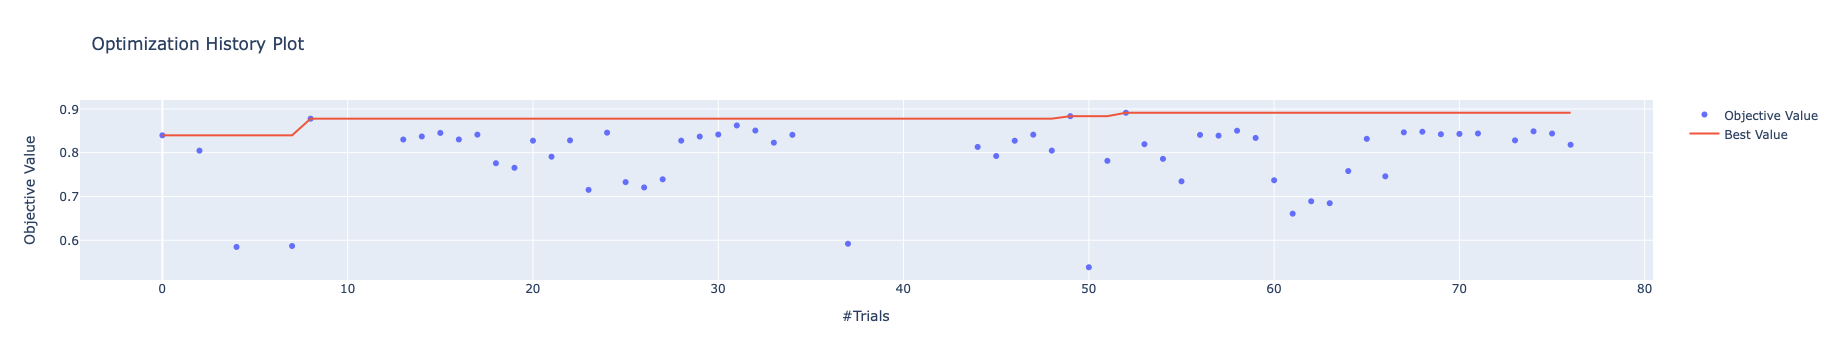

In [16]:
import optuna
import os 

import optuna.visualization as visualize


##for diseccting one case 


#import optuna.visualization.matplotlib as visualize
#refer to https://optuna.readthedocs.io/en/stable/tutorial/10_key_features/005_visualization.html#sphx-glr-tutorial-10-key-features-005-visualization-py 
#for how to plot stuff 


study = optuna.create_study()

#sdcc
diff_seed = "/direct/sdcc+u/dyhan316/VAE_ADHD/junbeom_finetuning/finetune_test/optuna_db/"
same_seed = "/direct/sdcc+u/dyhan316/VAE_ADHD/junbeom_finetuning/finetune_test_same_seed/optuna_db/"

#lab
same_seed_lab = "/direct/sdcc+u/dyhan316/VAE_ADHD/junbeom_finetuning/finetune_test_same_seed_lab/optuna_db/"

#######DIFF SEED######
#db_dir = os.path.join(diff_seed , "ADNI_ALZ_ADCN-freeze-cls-None-train_100-batch_32.db")
#db_dir = os.path.join(diff_seed , "ADNI_ALZ_ADCN-freeze-cls-UKByAa64a-train_100-batch_32.db")
#db_dir = os.path.join(diff_seed , "ADNI_ALZ_ADCN-tune_all-cls-None-train_100-batch_32.db")
#db_dir = os.path.join(diff_seed , "ADNI_ALZ_ADCN-tune_all-cls-UKByAa64a-train_100-batch_32.db")
#db_dir = os.path.join(diff_seed , "ADNI_ALZ_ADCN-freeze-cls-None-train_20-batch_16.db")
#db_dir = os.path.join(diff_seed , "ADNI_ALZ_ADCN-freeze-cls-UKByAa64a-train_20-batch_16.db")

########SAME SEED#######
##SDCC##(ADNI ALZ TASK)
#100
#db_dir = os.path.join(same_seed ,"ADNI_ALZ_ADCN-freeze-cls-UKByAa64a-train_100-batch_32.db")
#db_dir = os.path.join(same_seed , "ADNI_ALZ_ADCN-tune_all-cls-None-train_100-batch_64.db")
#db_dir = os.path.join(same_seed, "ADNI_ALZ_ADCN-tune_all-cls-UKByAa64a-train_100-batch_64.db")
#db_dir = os.path.join(same_seed, "ADNI_ALZ_ADCN-freeze-cls-UKByAa64a-train_100-batch_64.db")
#db_dir = os.path.join(same_seed , "ADNI_ALZ_ADCN-freeze-cls-None-train_100-batch_64.db")

##300
#db_dir = os.path.join(same_seed , "ADNI_ALZ_ADCN-freeze-cls-None-train_300-batch_64.db")
#db_dir = os.path.join(same_seed , "ADNI_ALZ_ADCN-freeze-cls-UKByAa64a-train_300-batch_64.db" )
#db_dir = os.path.join(same_seed , "ADNI_ALZ_ADCN-tune_all-cls-None-train_300-batch_64.db")
db_dir = os.path.join(same_seed , "ADNI_ALZ_ADCN-tune_all-cls-UKByAa64a-train_300-batch_64.db")



##########LAB########   (ABCD SEX TASK)
#db_dir = os.path.join(same_seed_lab , "ABCD_sex-freeze-cls-None-train_100-batch_64.db")
#db_dir = os.path.join(same_seed_lab , "ABCD_sex-freeze-cls-UKByAa64a-train_100-batch_64.db")
#db_dir = os.path.join(same_seed_lab , "ABCD_sex-tune_all-cls-None-train_100-batch_64.db")
#db_dir = os.path.join(same_seed_lab , "ABCD_sex-tune_all-cls-UKByAa64a-train_100-batch_64.db")

#now use main_optuna, not the modified version
#db_dir = os.path.join(same_seed_lab , "ABCD_sex-tune_all-cls-ABCDbt128a102-train_100-batch_32.db")

##TESTINg
#db_dir = "/sdcc/u/dyhan316/VAE_ADHD/junbeom_finetuning/finetune_trash/optuna_db/test-tune_all-cls-y-Aware_Contrastive_MRI_epoch_99-train_20-batch_8.db"


url = "sqlite:///" + db_dir #os.path.abspath(os.path.join(os.getcwd(), db_dir)) #이건 왜 그런지 abs path로 안줘서 (그렇게 하려고 해도), 안되무!! 
storage = optuna.storages.RDBStorage(
    url = url,
    heartbeat_interval = 60, 
    grace_period = 120    
)
study = optuna.load_study(study_name = "test_study_name", 
                                storage = storage)

print(study.best_trial)
print(study.best_trial.value)

    
    
print((study.trials_dataframe()['state'] == "COMPLETE").sum(), (study.trials_dataframe()['state'] == "FAIL").sum(),(study.trials_dataframe()['state'] == "PRUNED").sum(),(study.trials_dataframe()['state'] == "RUNNING").sum())


visualize.plot_optimization_history(study)#, )
#visualize.plot_intermediate_values(study)#,params = ["weight_decay", "learning_rate"])
#this doesn't work because I didn't use pruner, the intermediate values are not saved



#ADNI, all 64 
#print("run the things below tmr!! wanna see the results :)")
#Na : 0.0001901345087671811 6.958007026697329e-05 False inst
#Ua : 6.426425125067863e-06 2.2611770778719344e-09 False inst
#Nf : 0.25463017943043054 0.23019943315376581 False inst
#Uf : 0.7959121369946751 2.095952457066269e-05 True none




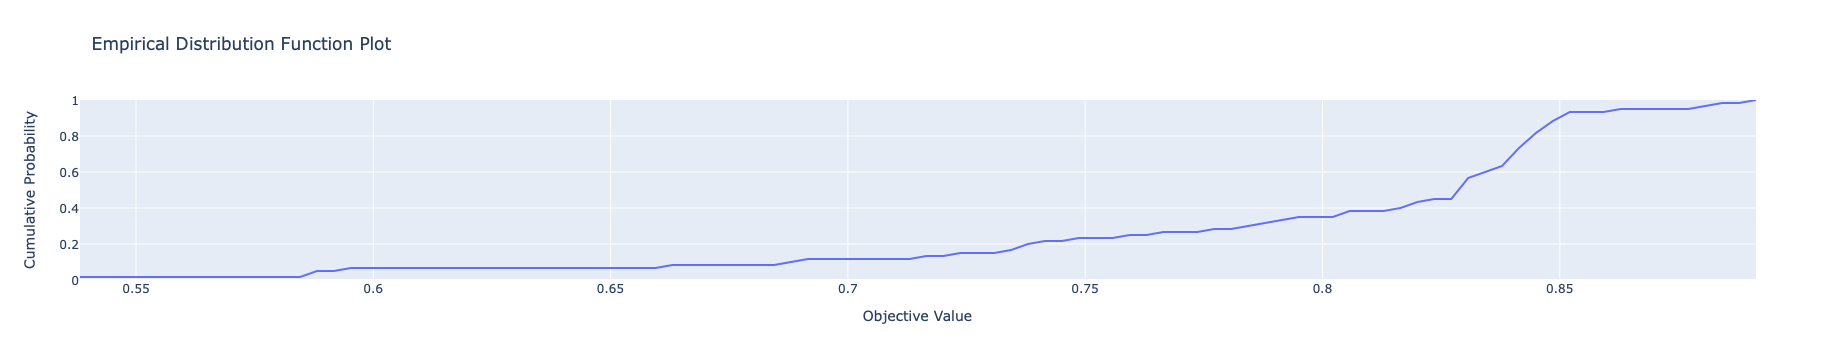

In [2]:
visualize.plot_edf(study)

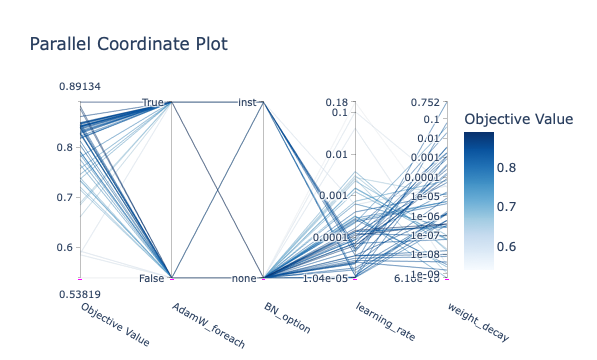

In [3]:
visualize.plot_parallel_coordinate(study)

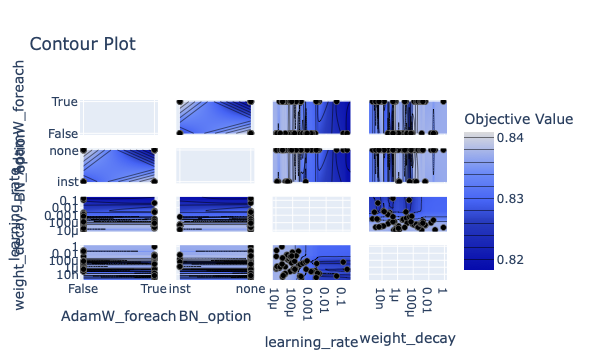

In [4]:
visualize.plot_contour(study)

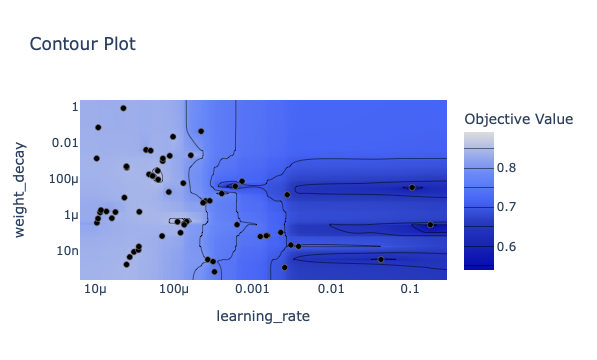

In [5]:
visualize.plot_contour(study, params = ['learning_rate', 'weight_decay'])

In [6]:
#visualize.plot_contour(study, params = ['AdamW_foreach', 'BN_option'])

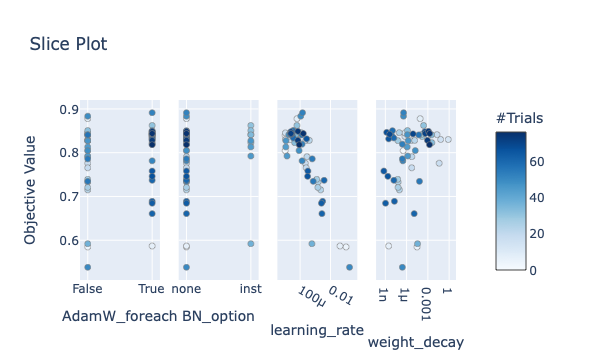

In [7]:
visualize.plot_slice(study)

maybe reduce the parameter range and run again once the general landscape is found?


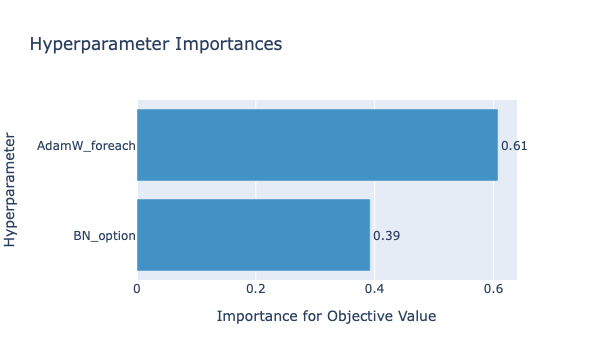

In [8]:
print("maybe reduce the parameter range and run again once the general landscape is found?")
optuna.visualization.plot_param_importances(study)


In [9]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_AdamW_foreach,params_BN_option,params_learning_rate,params_weight_decay,state
0,0,0.839725,2023-01-19 12:24:29.030278,2023-01-19 14:09:30.048966,0 days 01:45:01.018688,False,none,0.000010,1.220653e-03,COMPLETE
1,1,NaN,2023-01-19 12:24:45.450845,2023-01-19 12:25:50.675933,0 days 00:01:05.225088,False,inst,0.005000,1.011110e-03,PRUNED
2,2,0.804766,2023-01-19 12:24:55.565652,2023-01-19 14:17:28.867496,0 days 01:52:33.301844,False,none,0.000010,3.262667e-07,COMPLETE
3,3,NaN,2023-01-19 12:25:06.458204,2023-01-19 12:25:57.974477,0 days 00:00:51.516273,False,inst,0.036170,3.498880e-01,PRUNED
4,4,0.584610,2023-01-19 12:25:50.816042,2023-01-19 13:10:23.082738,0 days 00:44:32.266696,False,none,0.105766,2.956976e-05,COMPLETE
...,...,...,...,...,...,...,...,...,...,...
72,72,NaN,2023-01-20 20:59:56.973086,2023-01-20 21:00:16.739681,0 days 00:00:19.766595,True,inst,0.598424,3.406415e-04,PRUNED
73,73,0.828201,2023-01-20 21:00:16.918980,2023-01-20 22:45:12.558224,0 days 01:44:55.639244,True,none,0.000072,8.769753e-04,COMPLETE
74,74,0.848876,2023-01-20 21:54:18.312332,2023-01-20 23:33:54.157006,0 days 01:39:35.844674,True,none,0.000072,1.214848e-03,COMPLETE
75,75,0.843867,2023-01-20 22:45:12.743255,2023-01-21 00:35:19.741836,0 days 01:50:06.998581,True,none,0.000163,1.822902e-03,COMPLETE


In [10]:
(study.trials_dataframe()['state'] == "COMPLETE").sum(), (study.trials_dataframe()['state'] == "FAIL").sum(),(study.trials_dataframe()['state'] == "PRUNED").sum(),(study.trials_dataframe()['state'] == "RUNNING").sum()

#UKB : 17, 24

(60, 0, 17, 0)

In [11]:
df = study.trials_dataframe()

In [12]:
df.sort_values('value', ascending = False)

,number,value,datetime_start,datetime_complete,duration,params_AdamW_foreach,params_BN_option,params_learning_rate,params_weight_decay,state
52,52,0.891342,2023-01-20 11:27:41.071766,2023-01-20 13:58:08.719171,0 days 02:30:27.647405,True,none,0.000145,3.795718e-07,COMPLETE
49,49,0.883491,2023-01-20 10:33:37.890241,2023-01-20 12:29:35.914680,0 days 01:55:58.024439,False,none,0.000111,3.669485e-07,COMPLETE
8,8,0.877816,2023-01-19 13:10:23.224943,2023-01-19 15:25:13.392553,0 days 02:14:50.167610,False,none,0.000063,8.216230e-05,COMPLETE
31,31,0.862292,2023-01-20 00:10:04.774699,2023-01-20 02:25:21.425851,0 days 02:15:16.651152,True,inst,0.000062,2.503240e-04,COMPLETE
32,32,0.850651,2023-01-20 01:38:58.338122,2023-01-20 04:17:37.575222,0 days 02:38:39.237100,False,inst,0.000036,1.320484e-06,COMPLETE
...,...,...,...,...,...,...,...,...,...,...
40,40,NaN,2023-01-20 07:43:08.243794,2023-01-20 07:43:32.493097,0 days 00:00:24.249303,False,inst,836.977916,1.038953e-10,PRUNED
41,41,NaN,2023-01-20 07:43:09.351961,2023-01-20 07:43:31.128521,0 days 00:00:21.776560,False,inst,9995.481957,4.307128e-11,PRUNED
42,42,NaN,2023-01-20 07:43:16.452459,2023-01-20 07:43:55.615027,0 days 00:00:39.162568,False,inst,0.011969,4.008889e-11,PRUNED
43,43,NaN,2023-01-20 07:43:31.318557,2023-01-20 07:44:13.177048,0 days 00:00:41.858491,True,inst,0.014174,2.732281e-06,PRUNED


In [13]:
trial_to_look_at = 10  #have to add 1 on to this value (on pd) to make it corresponding
optuna.trial.Trial(study, trial_id = trial_to_look_at+1).params, optuna.trial.Trial(study, trial_id = trial_to_look_at+1).number

({'AdamW_foreach': 'False',
  'BN_option': 'none',
  'learning_rate': 2.2500629741255596,
  'weight_decay': 1.912087217868478e-09},
 10)

In [14]:
dsfsdf

NameError: name 'dsfsdf' is not defined

### Setting correct lr wd range for optuna

In [ ]:
import numpy as np
import math
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy.ma as ma
from numpy.random import uniform, seed
def plot_contour(ax, x, y, z, vmin=None, vmax=None):
    nan_place = np.argwhere(np.isnan(z))
    
    x_nan = x[nan_place]
    y_nan = y[nan_place]
    
    x = np.delete(x, nan_place )
    y = np.delete(y, nan_place )
    z = np.delete(z, nan_place )
              
    xi = np.linspace(x.min(),x.max(),1000)
    yi = np.linspace(y.min(),y.max(),1000)
    zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
    print(zi)
    
    ax.set_aspect(1)

    if vmin == None or vmax == None:
        levels = 30
    else : 
        levels = np.linspace(vmin, vmax, 20)
    print(zi)
    CS = ax.contour(xi,yi,zi, levels,linewidths=0.5,colors='k')
    CS = ax.contourf(xi,yi,zi,levels,cmap=plt.cm.jet)
    plt.colorbar(CS, ax = ax) #When calling plt.colorbar(CS,ax=ax), the ax parameter tells the colorbar function to use the subplot axes that was passed to the plot_contour function (ax) as the parent axes, instead of creating a new one. This way, the colorbar will be plotted in the same subplot as the contour plot and not as a separate figure.
    ax.scatter(x,y,marker='o',c='black', alpha = 0.3)
    ax.scatter(x_nan, y_nan, marker = 'x')
    margin = 0.1
    ax.set_xlim(x.min()-margin,x.max()+margin)
    ax.set_ylim(y.min()-margin,y.max()+margin)
    

    print(f"min {np.min(z)}")
    print(f"max {np.max(z)}")


In [ ]:
##### look_at_this = None

#print(set(final_stats.Taskname))

print("instBN이랑 일반이랑 위에서 directory정의 다르게 해서 비교하기! (with same vmin and vmax values")

#for batch_size in sorted(list(set(final_stats.batch_size))):
#    for task_name in sorted(list(set(final_stats.Taskname))):
        
look_at_this = df

metrics2plt = ['value','value']#, 'auroc_std'] #'loss_mean', 'epoch_mean'

x_y_data = look_at_this[['params_learning_rate', 'params_weight_decay']].to_numpy() 

x,y = x_y_data[:,0], x_y_data[:,1]
x,y = np.log10(x), np.log10(y)   

#if x.shape[0] < 1 or y.shape[0] < 1 : #skip if empty
#    continue        
fig, axs = plt.subplots(1, len(metrics2plt), figsize=(18, 6))
#fig.suptitle(f'{task_name} | batch_size : {batch_size}', fontsize=16)

for i,metric in enumerate(metrics2plt) : 
    z = look_at_this[[metric]].to_numpy()[:,0] #epoch_mean, loss_mean
    if metric == ['auroc_mean','auroc_mean'] :
        vmin , vmax = 0.55, 0.65
    else : 
        vmin , vmax = None, None
    #import pdb ; pdb.set_trace()
    plot_contour(axs[i],x,y,z) #, vmin = vmin, vmax = vmax)#) #vmin = 0.5, vmax = 0.65)
    axs[i].set_title(metric)
plt.show()

##things to change
##value value 가 아니라 하나만 plotting하고, 

In [ ]:
##밑에꺼는 예시이니 고치기 => 어쨋튼 어떤 레인지로 해야할지 대총 감이 온다 
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dataframe with only the columns you want to use for the heatmap
data = df[["value", "params_AdamW_foreach", "params_BN_option", "params_learning_rate", "params_weight_decay"]]

# Use seaborn to create a heatmap of the "value" column
#sns.heatmap(data.pivot("params_AdamW_foreach", "params_BN_option", "value"), cmap="YlGnBu")

# Use the "state" column to color the points red if the state was "pruned"
sns.scatterplot(x="params_learning_rate", y="params_weight_decay", hue="state", data=df, style="state", markers={"PRUNED":"X", "FAIL" : ",", "COMPLETE" : ".", "RUNNING" : "."})

# Show the plot
plt.xscale("log")
plt.yscale("log")
plt.rcParams["figure.figsize"] = (10,5)
plt.show()


In [ ]:
#10-5 이상 

### saving the plots


In [ ]:
import optuna
import os 

import optuna.visualization as visualize

study = optuna.create_study()

#sdcc
diff_seed = "/direct/sdcc+u/dyhan316/VAE_ADHD/junbeom_finetuning/finetune_test/optuna_db/"
same_seed = "/direct/sdcc+u/dyhan316/VAE_ADHD/junbeom_finetuning/finetune_test_same_seed/optuna_db/"

#lab
same_seed_lab = "/direct/sdcc+u/dyhan316/VAE_ADHD/junbeom_finetuning/finetune_test_same_seed_lab/optuna_db/"

def load_study(db_dir):
    url = "sqlite:///" + db_dir #os.path.abspath(os.path.join(os.getcwd(), db_dir)) #이건 왜 그런지 abs path로 안줘서 (그렇게 하려고 해도), 안되무!! 
    storage = optuna.storages.RDBStorage(
        url = url,
        heartbeat_interval = 60, 
        grace_period = 120    
    )
    study = optuna.load_study(study_name = "test_study_name", 
                                storage = storage)
    #print(db_dir)
    #print(study.best_trial)
    print(study.best_trial.value)   
    print((study.trials_dataframe()['state'] == "COMPLETE").sum(), (study.trials_dataframe()['state'] == "FAIL").sum(),(study.trials_dataframe()['state'] == "PRUNED").sum(),(study.trials_dataframe()['state'] == "RUNNING").sum())
    
    return study


diff_seed_study = {}

to_do = ["ADNI_ALZ_ADCN-freeze-cls-None-train_100-batch_32.db",
"ADNI_ALZ_ADCN-freeze-cls-UKByAa64a-train_100-batch_32.db",
"ADNI_ALZ_ADCN-tune_all-cls-None-train_100-batch_32.db",
"ADNI_ALZ_ADCN-tune_all-cls-UKByAa64a-train_100-batch_32.db",
"ADNI_ALZ_ADCN-freeze-cls-None-train_20-batch_16.db",
"ADNI_ALZ_ADCN-freeze-cls-UKByAa64a-train_20-batch_16.db"]

for key in to_do : 
    try : 
        diff_seed_study[key] = load_study(os.path.join(diff_seed , key))
        print(key, '\n________')
    except : 
        continue

print("=================")

ADNI_ALZ_study = {}

to_do = ["ADNI_ALZ_ADCN-tune_all-cls-None-train_100-batch_64.db",
"ADNI_ALZ_ADCN-tune_all-cls-UKByAa64a-train_100-batch_64.db",
"ADNI_ALZ_ADCN-freeze-cls-None-train_100-batch_64.db",
"ADNI_ALZ_ADCN-freeze-cls-UKByAa64a-train_100-batch_64.db",
 "ADNI_ALZ_ADCN-freeze-cls-None-train_300-batch_64.db",
 "ADNI_ALZ_ADCN-freeze-cls-UKByAa64a-train_300-batch_64.db",
 "ADNI_ALZ_ADCN-tune_all-cls-None-train_300-batch_64.db",
"ADNI_ALZ_ADCN-tune_all-cls-UKByAa64a-train_300-batch_64.db"]


for key in to_do : 
    try  : 
        ADNI_ALZ_study[key] = load_study(os.path.join(same_seed , key))
        print(key)
        print('________')
    except : 
        continue

print("=================")

ABCD_sex_study = {}

to_do = ["ABCD_sex-freeze-cls-None-train_100-batch_64.db",
"ABCD_sex-freeze-cls-UKByAa64a-train_100-batch_64.db",
"ABCD_sex-tune_all-cls-None-train_100-batch_64.db",
"ABCD_sex-tune_all-cls-UKByAa64a-train_100-batch_64.db"]


for key in to_do : 
    try : 
        ABCD_sex_study[key] = load_study(os.path.join(same_seed_lab , key))
        print(key, '\n________')
    except : 
        continue

print("=================")


#diff_seed_study, ADNI_ALZ_study, ABCD_sex_study

In [ ]:
import optuna.visualization.matplotlib as visualize
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_pdf import PdfPages


def plot_slices(title, study):
    #plt.rcParams['figure.figsize'] = (10,4) 
    plt1 = visualize.plot_slice(study, target_name = "mean_AUROC", params = ["BN_option","learning_rate", "weight_decay"])
    plt.suptitle(title, fontsize=15, fontweight = 'bold')

    plt1[1].set_xlim([1e-9, 1e5])
    plt1[2].set_xlim([1e-12, 1e2])
    
    
#def plot_slices(title, study):
#    plt.rcParams['figure.figsize'] = (10,4) 
#    plt1 = visualize.plot_slice(study, target_name = "mean_AUROC", params = ["BN_option","learning_rate", "weight_decay"])
#    plt.suptitle(title, fontsize=15, fontweight = 'bold')
#    plt1[1].set_xlim([1e-7, 1e4])
#    plt1[2].set_xlim([1e-9, 1e0])
    

#https://stackoverflow.com/questions/26368876/saving-all-open-matplotlib-figures-in-one-file-at-once
def save_page(filename, figs=None, dpi=200):
    pp = PdfPages(filename)
    if figs is None:
        figs = [plt.figure(n) for n in plt.get_fignums()]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()
    
    
for key, value in ABCD_sex_study.items() : 
    plot_slices(title = key, study = value)    
print("================")
for key, value in ADNI_ALZ_study.items() : 
    plot_slices(title = key, study = value)    


    
    
save_page('./save_optuna_results/test.pdf')


In [ ]:
plt.show()

In [ ]:
import optuna.visualization.matplotlib as visualize
fig1 = visualize.plot_slice(study1)
fig2 = visualize.plot_slice(study2)
fig3 = visualize.plot_slice(study3)
fig4 = visualize.plot_slice(study4)
plt.show()

In [ ]:
import matplotlib.pyplot as plt 
import optuna.visualization.matplotlib as visualize

#fig, ax = plt.subplots(nrows = 4, ncols= 2)
fig = visualize.plot_slice(study)
#for ax in fig : 
#    ax.set_title("thing")

plt.suptitle("haha", fontsize=20, fontweight = 'bold')
#print(fig)
#fig[0].set_title("haha")
#fig[0].figure.savefig("./save_optuna_results/first_image.png")
#fig[1].figure.savefig("./save_optuna_results/second_image.png")
#fig[2].figure.savefig("./save_optuna_results/third_image.png")
#fig[3].figure.savefig("./save_optuna_results/fourth_image.png")

In [ ]:
import matplotlib.pyplot as plt


def subplot(data, fig=None, index=111):
    if fig is None:
        fig = plt.figure()
    ax = fig.add_subplot(index)
    ax.plot(data)
    

ax = 

#fig1 = visualize.plot_slice(study)
#fig2 = visualize.plot_slice(study2)
#
#fig1[0].axes.append(fig2)
#
#plt.show()



#visualize.plot_slice(study)



#visualize.plot_slice(study)
#visualize.plot_slice(study2)
#plt.show()
#
#fig = plt.gcf()
#print(fig)


#fig = plt.gcf()
#print(fig)
#plt.savefig("./save_optuna_results/first_image.png")

#fig, axs = plt.subplots(2, 2) # Creates a 2x2 grid of subplots
#plt.sca(axs[0, 0]) # Set the current axis to the first subplot
#visualize.plot_slice(study)
#
#plt.sca(axs[0, 1])
#visualize.plot_slice(study2)
#plt.sca(axs[1, 0])
#visualize.plot_slice(study)
#plt.sca(axs[1, 1])
#visualize.plot_slice(study)





In [ ]:
fig = visualize.plot_optimization_history(study)
fig.figure.savefig("./save_optuna_results/try.png")

In [ ]:
import os 
os.mkdir('./save_optuna_results')